#**-------------------------------------TRABALHO PST---------------------------------------**

## **Estrutura do projeto:**

**Notebook 1:** Análise de Dados Exploratória | Baseline Models

**Notebook 2:** Statistical Models - AutoARIMA

**Notebook 3:** Statistical Models - AutoETS

**Notebook 4:** Machine Learning Models

**Notebook 5:** Neural Networks Models

**Notebook 6:** Regressores e Intervalos de Previsão | Conclusão

## **NOTEBOOK 1 | Baseline Models**

**Realizado por:**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

---------------------------------------------------------
**Dataset escolhido:**
- Foods1_CA4 -> Departamento Foods1 da loja 4 do Estado da Califórnia

## **1. IMPORTS**

In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from statsforecast.models import SeasonalNaive, HistoricAverage
from statsforecast import StatsForecast

## **2. DATA UPLOAD | DIVISÃO TREINO E TESTE**

### Data upload

In [ ]:
base_url = 'https://datasets-nixtla.s3.amazonaws.com'
Y_df = pd.read_parquet(f'{base_url}/m5_y.parquet')

In [ ]:
Y_df_FOODS1 = Y_df[Y_df['unique_id'].str.startswith('FOODS_1')]
Y_df_FOODS1_CA4 = Y_df_FOODS1[Y_df_FOODS1['unique_id'].str.endswith('CA_4')]
Y_df_FOODS1_CA4

,unique_id,ds,y
5907,FOODS_1_001_CA_4,2011-01-30,1.0
5908,FOODS_1_001_CA_4,2011-01-31,1.0
5909,FOODS_1_001_CA_4,2011-02-01,1.0
5910,FOODS_1_001_CA_4,2011-02-02,1.0
5911,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,2.0
3635184,FOODS_1_219_CA_4,2016-06-16,1.0
3635185,FOODS_1_219_CA_4,2016-06-17,4.0
3635186,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
Y_df_FOODS1_CA4.shape

(355373, 3)

In [ ]:
###   CÓPIA PARA APENAS df DO DEPARTAMENTO ESCOLHIDO  ###

df = Y_df_FOODS1_CA4.copy()
df

,unique_id,ds,y
5907,FOODS_1_001_CA_4,2011-01-30,1.0
5908,FOODS_1_001_CA_4,2011-01-31,1.0
5909,FOODS_1_001_CA_4,2011-02-01,1.0
5910,FOODS_1_001_CA_4,2011-02-02,1.0
5911,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,2.0
3635184,FOODS_1_219_CA_4,2016-06-16,1.0
3635185,FOODS_1_219_CA_4,2016-06-17,4.0
3635186,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355373 entries, 5907 to 3635187
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   unique_id  355373 non-null  category      
 1   ds         355373 non-null  datetime64[ns]
 2   y          355373 non-null  float32       
dtypes: category(1), datetime64[ns](1), float32(1)
memory usage: 8.7 MB


In [ ]:
### FAZER DOWNLOAD DO FICHEIRO 'Foods_CA4.csv' NA ABA FICHEIROS DO COLAB ###

df.to_csv("Foods1_CA4.csv", index=False)

In [ ]:
# Quantidade de observações por serie

uids = df['unique_id'].unique()
for unique_id in uids:
    count = df[df['unique_id'] == unique_id].shape[0]
    print(f"Number of observations of time series {unique_id}: {count}")

Number of observations of time series FOODS_1_001_CA_4: 1968
Number of observations of time series FOODS_1_002_CA_4: 1968
Number of observations of time series FOODS_1_003_CA_4: 1968
Number of observations of time series FOODS_1_004_CA_4: 1565
Number of observations of time series FOODS_1_005_CA_4: 1969
Number of observations of time series FOODS_1_006_CA_4: 1969
Number of observations of time series FOODS_1_008_CA_4: 1705
Number of observations of time series FOODS_1_009_CA_4: 1567
Number of observations of time series FOODS_1_010_CA_4: 1786
Number of observations of time series FOODS_1_011_CA_4: 1969
Number of observations of time series FOODS_1_012_CA_4: 1786
Number of observations of time series FOODS_1_013_CA_4: 1565
Number of observations of time series FOODS_1_014_CA_4: 830
Number of observations of time series FOODS_1_015_CA_4: 1893
Number of observations of time series FOODS_1_016_CA_4: 1891
Number of observations of time series FOODS_1_017_CA_4: 1562
Number of observations of

### Conjunto de treino e teste

In [ ]:
train = df[df['ds'] <= '2016-05-22']
train

,unique_id,ds,y
5907,FOODS_1_001_CA_4,2011-01-30,1.0
5908,FOODS_1_001_CA_4,2011-01-31,1.0
5909,FOODS_1_001_CA_4,2011-02-01,1.0
5910,FOODS_1_001_CA_4,2011-02-02,1.0
5911,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
3635155,FOODS_1_219_CA_4,2016-05-18,3.0
3635156,FOODS_1_219_CA_4,2016-05-19,2.0
3635157,FOODS_1_219_CA_4,2016-05-20,2.0
3635158,FOODS_1_219_CA_4,2016-05-21,6.0


In [ ]:
test = df[df['ds'] > '2016-05-22'].rename(columns={'y': 'y_test'})
test

,unique_id,ds,y_test
7847,FOODS_1_001_CA_4,2016-05-23,2.0
7848,FOODS_1_001_CA_4,2016-05-24,0.0
7849,FOODS_1_001_CA_4,2016-05-25,0.0
7850,FOODS_1_001_CA_4,2016-05-26,6.0
7851,FOODS_1_001_CA_4,2016-05-27,0.0
...,...,...,...
3635183,FOODS_1_219_CA_4,2016-06-15,2.0
3635184,FOODS_1_219_CA_4,2016-06-16,1.0
3635185,FOODS_1_219_CA_4,2016-06-17,4.0
3635186,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
train.shape, test.shape

((349325, 3), (6048, 3))

## **3. ANÁLISE DE DADOS EXPLORATÓRIA**

### Análise de tendência e de sazonalidade

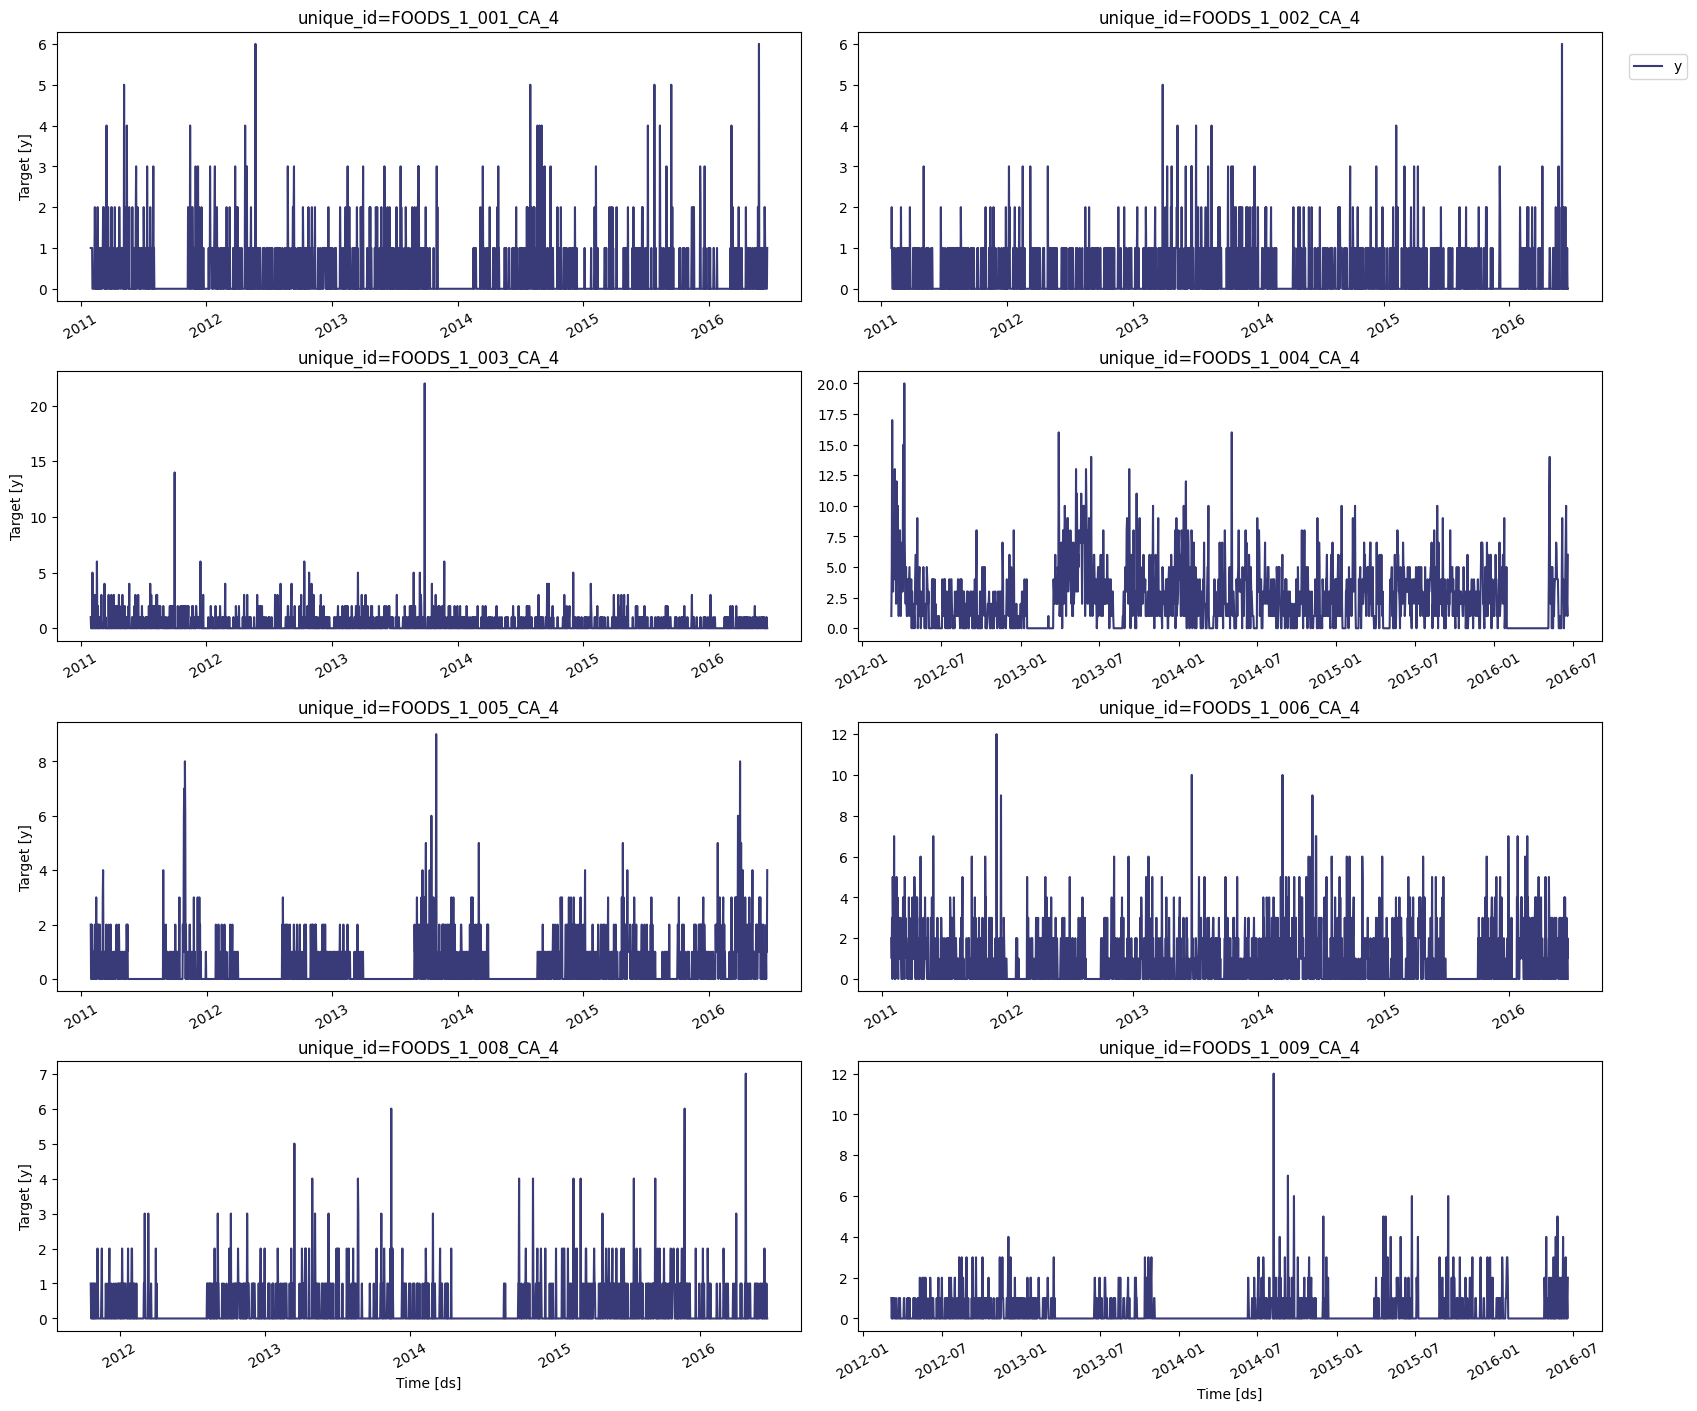

In [ ]:
StatsForecast.plot(df, plot_random = False)

Verificam-se muitas observações com vendas iguais a zero, o que indica esparsidades nas séries (produtos com vendas pouco frequentes), podendo dificultar o processo de previsão.

Há picos ocasionais, que podem eventualmente corresponder a promoções, eventos sazonais ou padrões de compra irregulares.

Considerando que estamos a trabalhar na área do retalho, entendeu-se interessante analisar o último mês de vendas:

In [ ]:
plot_analise = df[(df['ds'] >= '2016-04-22') & (df['ds'] <= '2016-05-22')]

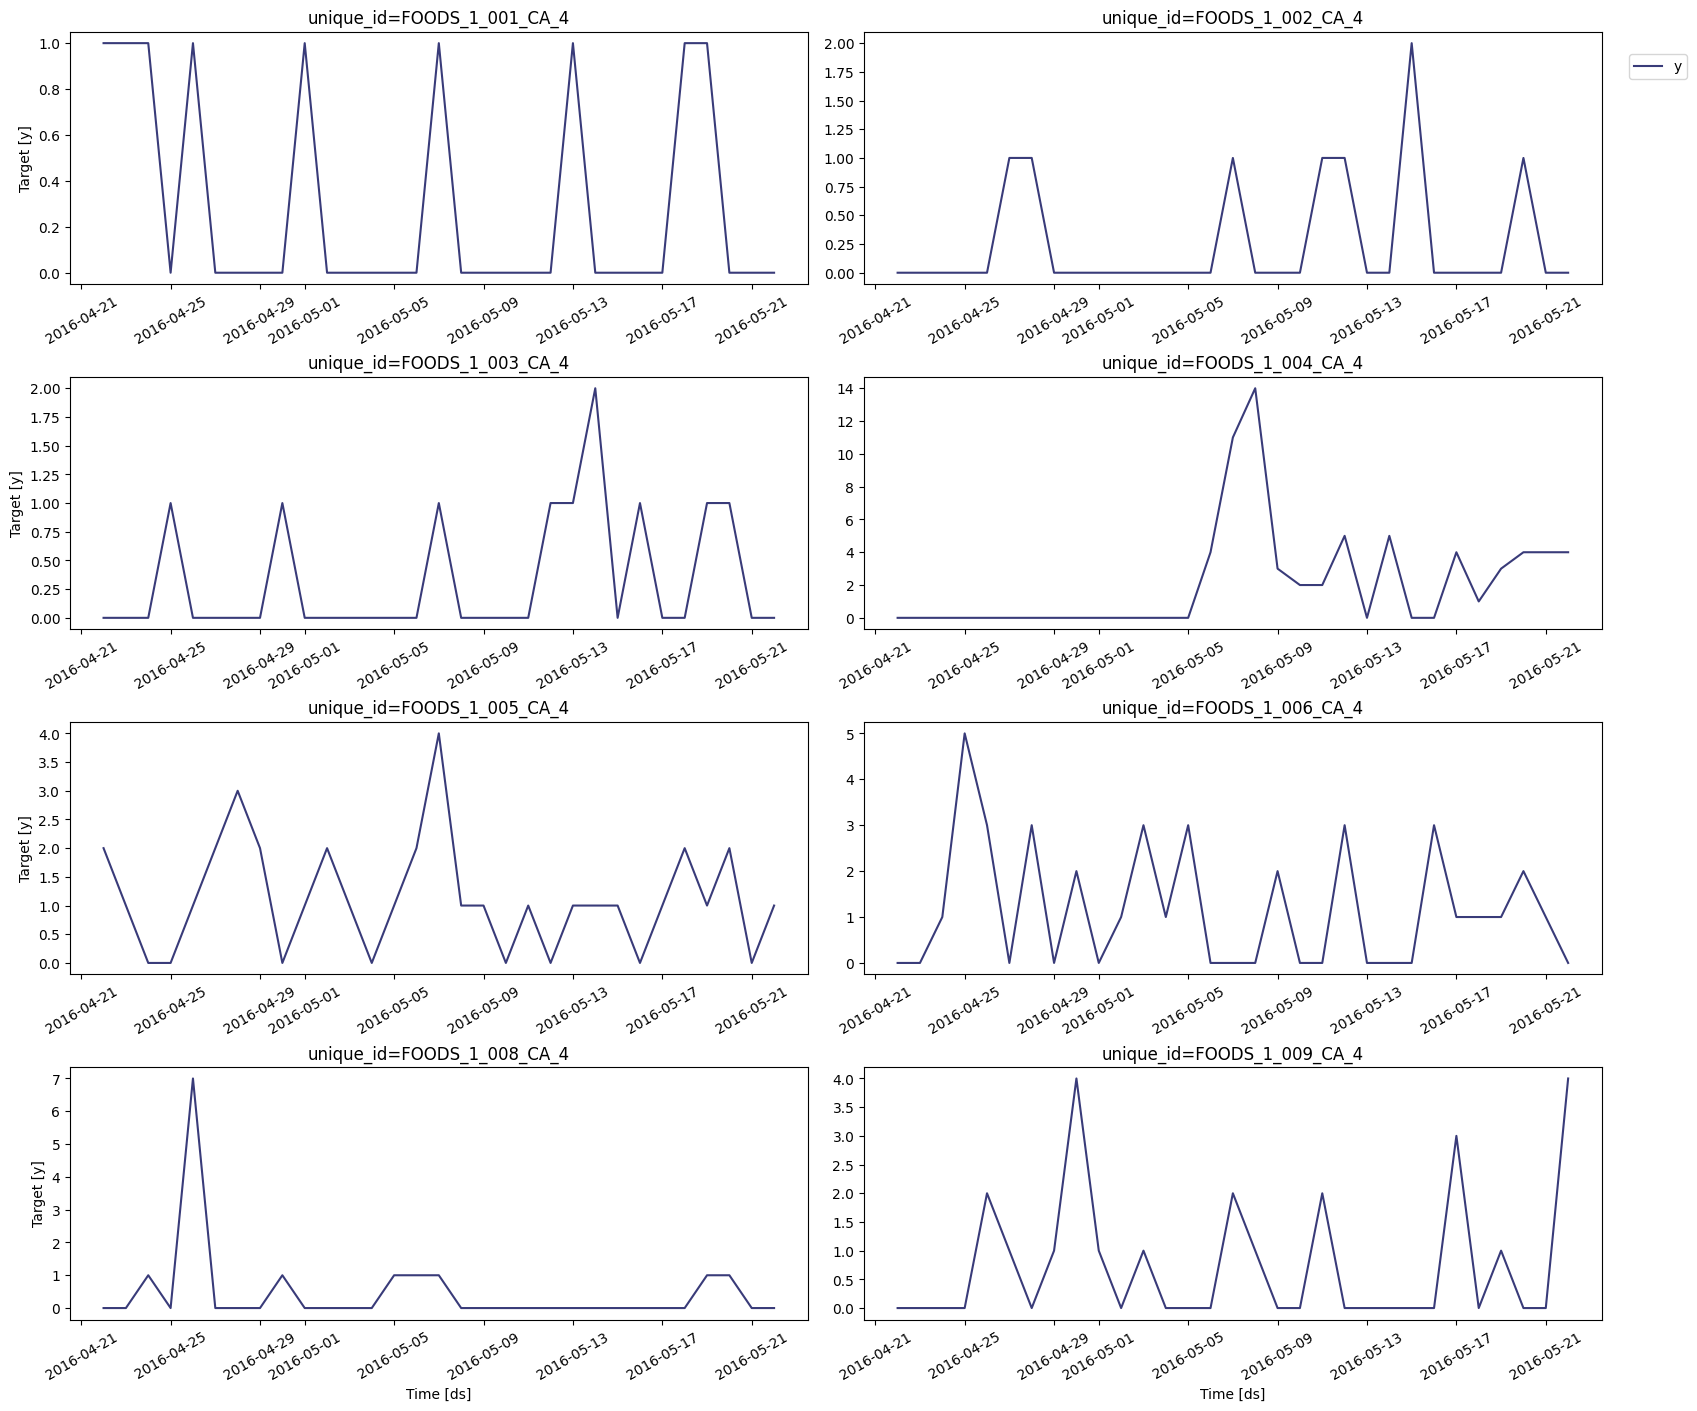

In [ ]:
StatsForecast.plot(plot_analise, plot_random = False)

Pela análise dos graficos acima, verifica-se:

- padrões de flutuação, com altos e baixos a cada poucos dias;
- novamente a presença de zeros intercalados: existem vários dias com vendas nulas;
- picos regulares a cada poucos dias, o que pode indicar algum padrão de compra semanal ou um evento promocional repetido.

## **4. MODELING**

### Dataset parameters

In [ ]:
freq = 'D'
season_length = 7
horizon = 28

1) O dataset da M5 Competition (Walmart sales data) contém vendas diárias de produtos, portanto, usar freq = 'D' é adequado com a granularidade temporal real dos dados.

2) Em vendas no retalho (como no M5), é comum observar padrões semanais: por exemplo, vendas maiores aos fins de semana ou em dias específicos da semana. Assim, "season_length = 7" corresponde a uma semana, o que é uma sazonalidade natural em séries temporais diárias de consumo.

3) "horizon = 28": a previsão, das vendas diárias, vai ser efetuada para os 28 dias seguintes (horizonte de previsão).

### Instanciar modelos

Vão ser definidos 2 modelos base:
- Seasonal Naive - prevê que o valor futuro será igual ao valor que ocorreu na mesma posição da última *season*;
- Historic Average - prevê que o valor futuro será a média histórica dos valores observados.

In [ ]:
models = [
    SeasonalNaive(season_length=season_length),
    HistoricAverage(),
]

In [ ]:
sf = StatsForecast(
    models=models,
    freq=freq,
    n_jobs=-1
)

In [ ]:
forecasts = sf.forecast(df=train, h=horizon)
forecasts

,unique_id,ds,SeasonalNaive,HistoricAverage
0,FOODS_1_001_CA_4,2016-05-23,0.0,0.357732
1,FOODS_1_001_CA_4,2016-05-24,0.0,0.357732
2,FOODS_1_001_CA_4,2016-05-25,1.0,0.357732
3,FOODS_1_001_CA_4,2016-05-26,1.0,0.357732
4,FOODS_1_001_CA_4,2016-05-27,0.0,0.357732
...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,3.0,1.442040
6044,FOODS_1_219_CA_4,2016-06-16,2.0,1.442040
6045,FOODS_1_219_CA_4,2016-06-17,2.0,1.442040
6046,FOODS_1_219_CA_4,2016-06-18,6.0,1.442040


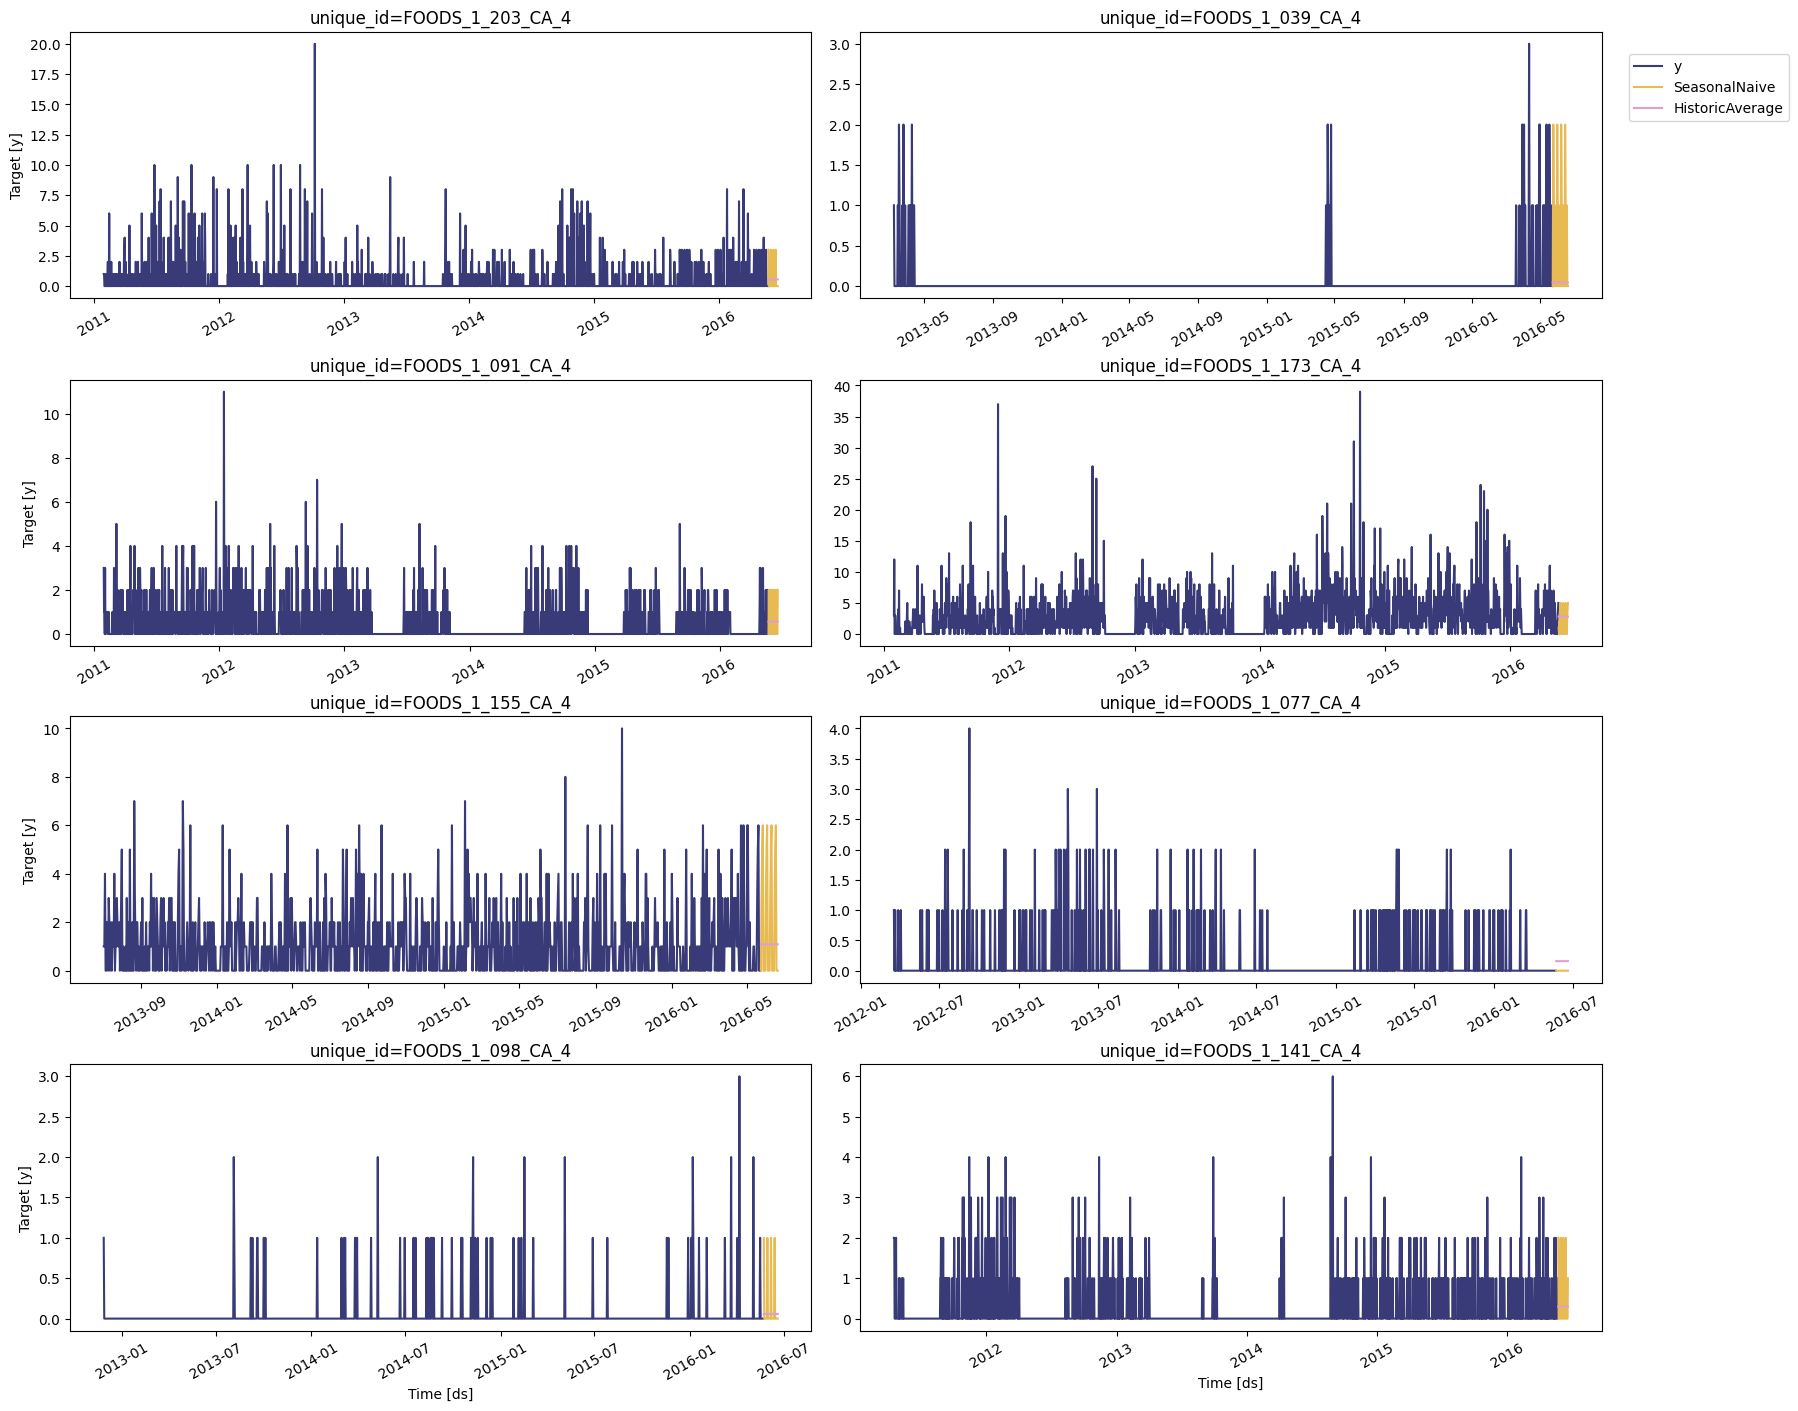

In [ ]:
sf.plot(train, forecasts)

## **5. ANÁLISE DAS MÉTRICAS**

In [ ]:
def rmsse(y, y_hat, y_train, seasonality):
    delta_y = (y - y_hat) ** 2
    delta_y = np.average(delta_y)
    scale = (y_train[:-seasonality] - y_train[seasonality:]) ** 2
    scale = np.average(scale)
    rmsse = np.sqrt(delta_y / scale)
    return rmsse

def mase(y, y_hat, y_train, seasonality):
    delta_y = abs(y - y_hat)
    delta_y = np.average(delta_y)
    scale = abs(y_train[:-seasonality] - y_train[seasonality:])
    scale = np.average(scale)
    mase = delta_y / scale
    return mase

def model_evaluation(y_hist, y_true, y_pred, Model, seasonality):

    results_row = [{"Model": Model,
                    "MSE": metrics.mean_squared_error(y_true, y_pred),
                    "MAE": metrics.mean_absolute_error(y_true, y_pred),
                    "RMSE": np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
                    "RMSSE": rmsse(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality),
                    "MASE": mase(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality)
                   }]

    results = pd.DataFrame.from_records(results_row)
    return results

In [ ]:
### FAZER DOWNLOAD DO FICHEIRO 'results_PST1' NA ABA FICHEIROS DO COLAB ###

Models_results = pd.DataFrame()

new_result = model_evaluation(train["y"], test["y_test"], forecasts["SeasonalNaive"], "Seasonal Naive", season_length)
Models_results = pd.concat([Models_results, new_result], ignore_index=True)

new_result = model_evaluation(train["y"], test["y_test"], forecasts["HistoricAverage"], "Historic Average", season_length)
Models_results = pd.concat([Models_results, new_result], ignore_index=True)

Models_results.to_csv("results_PST1.csv", index=False)

Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179


O modelo Historic Average superou o Seasonal Naive em todas as métricas, o que pode indicar que:

- A sazonalidade semanal não é forte ou é irregular;

- A média histórica é um preditor mais robusto, especialmente em séries com alta variabilidade ou vendas esparsas;

- Os 2 modelos têm MASE > 1, o que sugere espaço para melhoria com modelos mais avançados.

### Plot das previsões

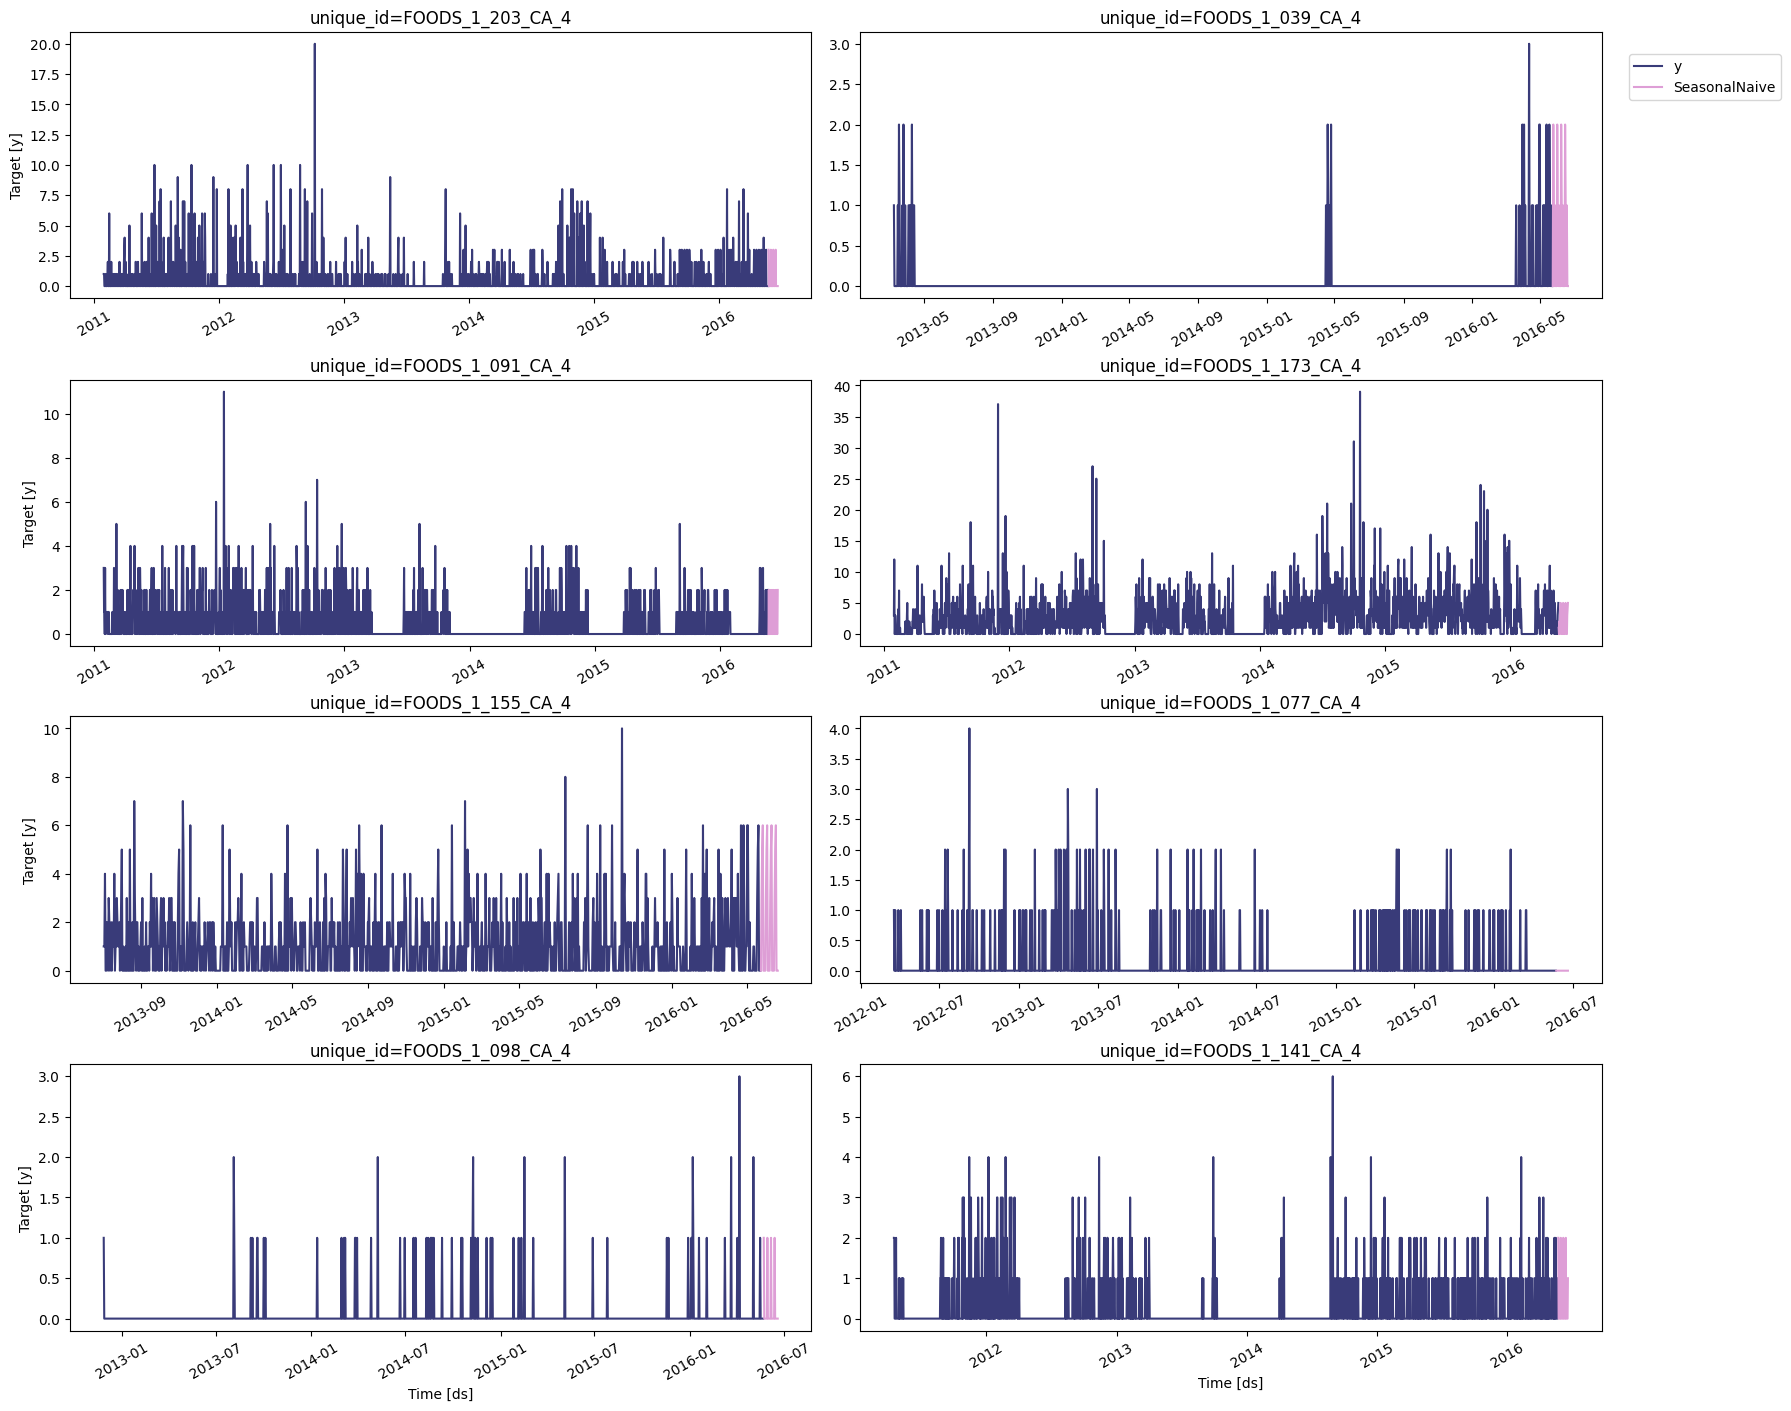

In [ ]:
sf.plot(train, forecasts, models=['SeasonalNaive'])

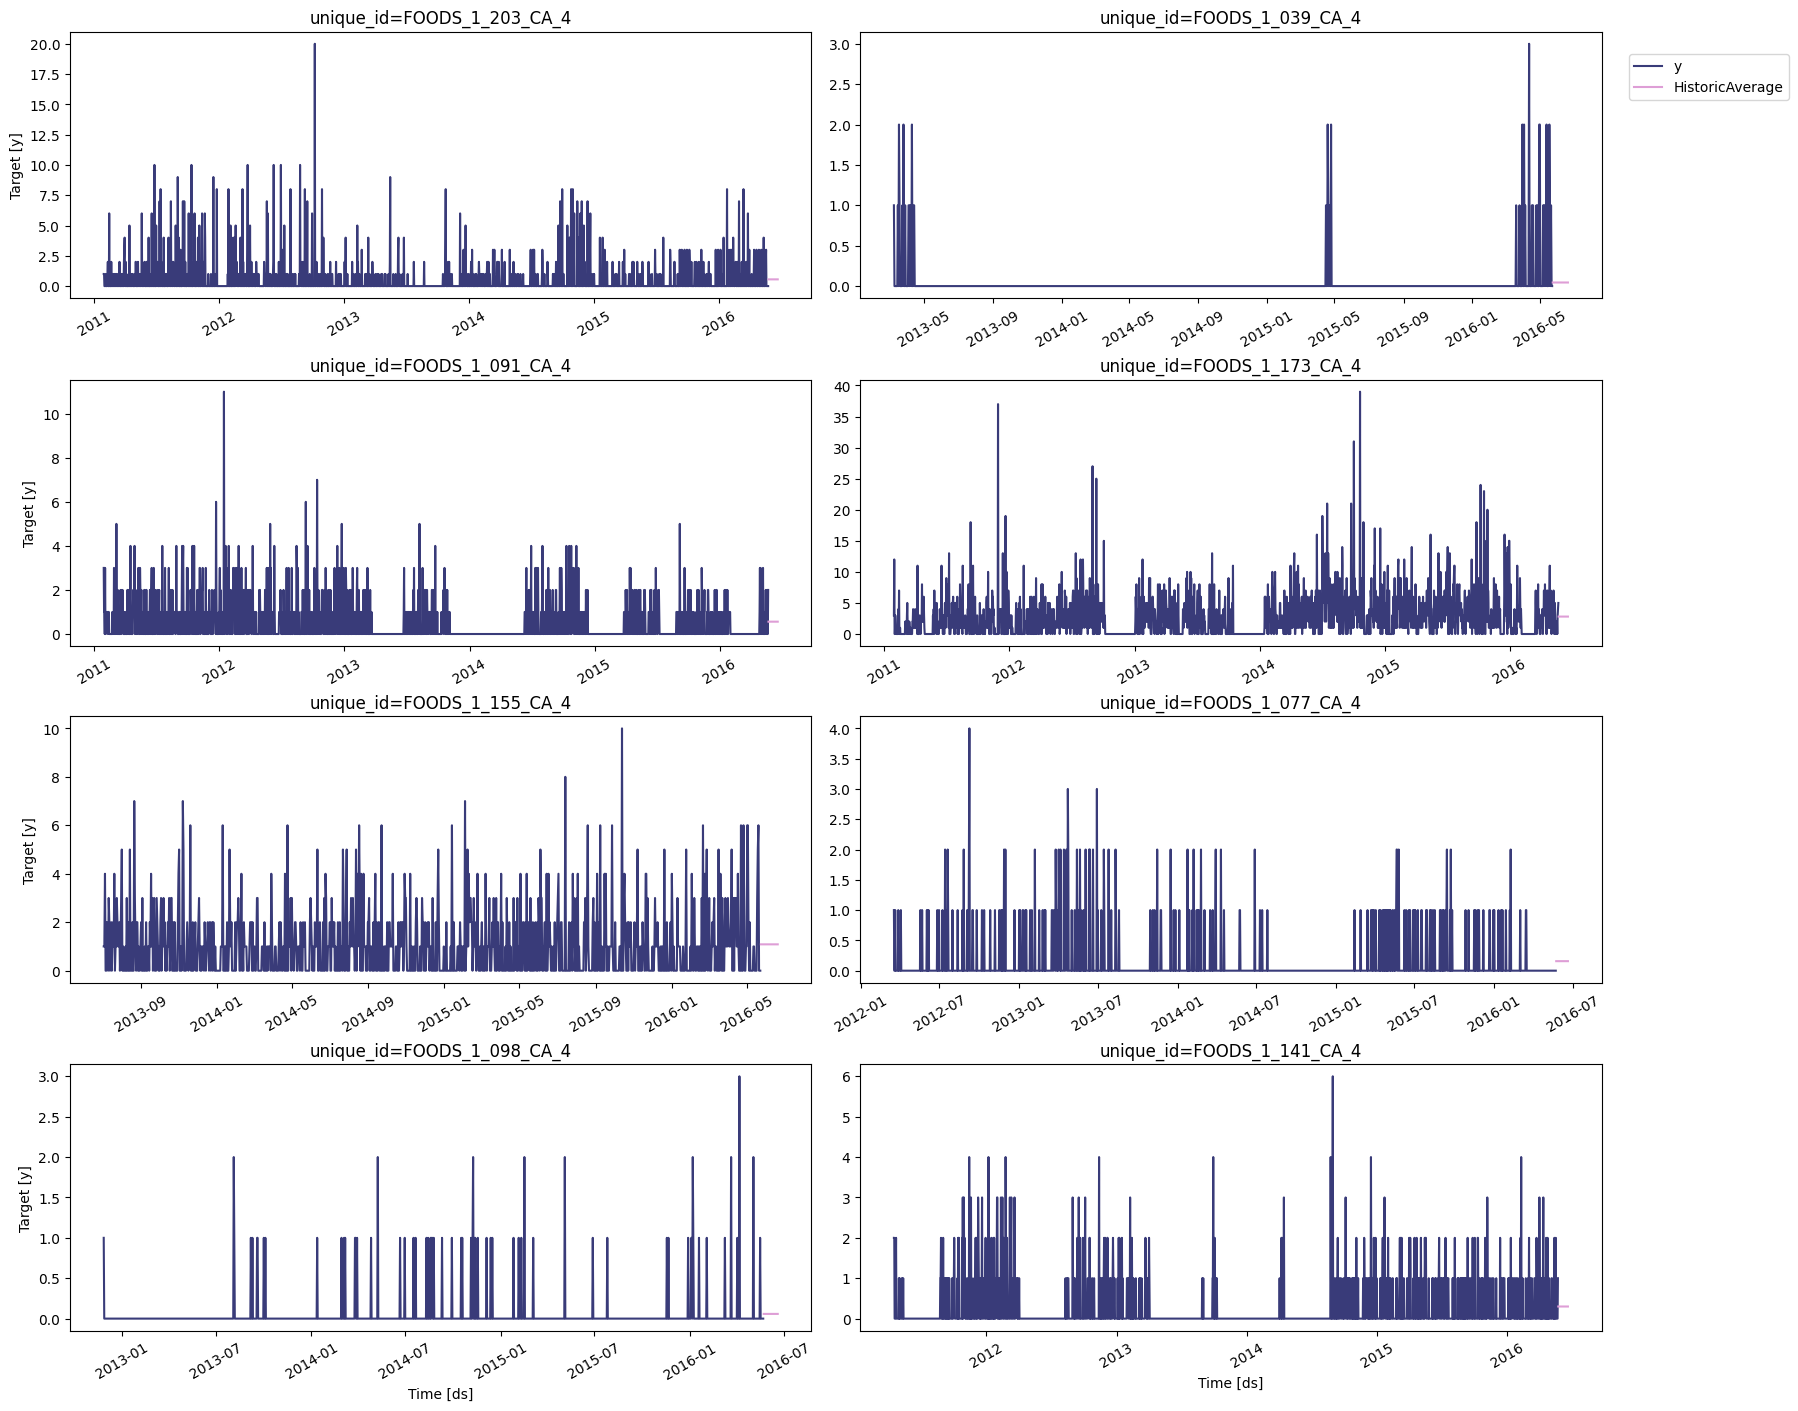

In [ ]:
sf.plot(train, forecasts, models=['HistoricAverage'])